# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Suspended Matter

In [ ]:
# Read in suspended matter data frame + create Year, Month, Day variables. 
sm_df = pd.read_csv("/content/drive/My Drive/Upper Lake Data/Copy of Suspended Matter_LW.csv", parse_dates=True)
sm_df["date"] = pd.to_datetime(sm_df["date"], errors='coerce')
sm_df['Year'] = pd.to_datetime(sm_df['date']).dt.strftime('%Y')
sm_df['Month'] = pd.to_datetime(sm_df['date']).dt.strftime('%m')
sm_df['Day'] = pd.to_datetime(sm_df['date']).dt.strftime('%d')

print(sm_df.head())
print(min(sm_df["date"]),max(sm_df["date"]))
print(sm_df.describe())

        date  Suspended Matter  Year Month Day
0 2016-04-29          0.556777  2016    04  29
1 2016-04-30          0.545022  2016    04  30
2 2016-05-03          0.538244  2016    05  03
3 2016-05-04          0.582780  2016    05  04
4 2016-05-07          0.547477  2016    05  07
2016-04-29 00:00:00 2023-03-09 00:00:00
       Suspended Matter
count       2182.000000
mean           0.513443
std            0.076316
min            0.000000
25%            0.446670
50%            0.505725
75%            0.584074
max            0.686303


Date range from 2016-04-29 to 2023-03-09, mean suspended matter is 0.51 with a standard devition of 0.08. Looking for more information on suspended matter calculation and threshold range. I'm assuming the values are mg/L? These seem very low. 

<Axes: xlabel='date', ylabel='Count'>

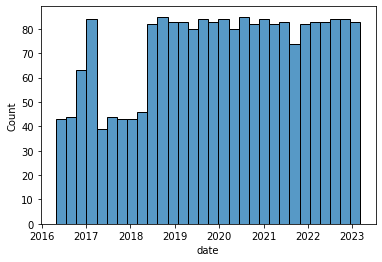

In [ ]:
sns.histplot(data = sm_df, x = 'date', bins = 30)

Pretty uniform data collection over the last 4 years.

<Axes: xlabel='Suspended Matter', ylabel='Count'>

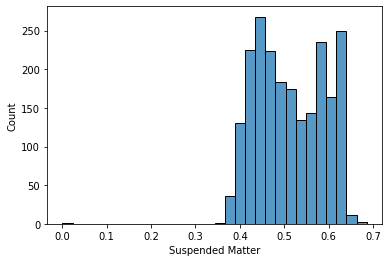

In [ ]:
sns.histplot(data = sm_df, x = 'Suspended Matter', bins = 30)

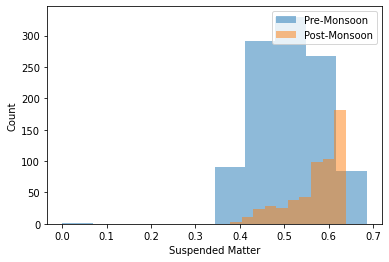

In [ ]:
# Monsoon periods separated out 
pre_monsoon_data = sm_df[sm_df['Month'].str.startswith(('01', '02', '03', '04', '05', '06'))]
post_monsoon_data = sm_df[sm_df['Month'].str.startswith(('07', '08', '09'))]

# Create a histogram of suspended matter for pre-monsoon and post-monsoon periods
plt.hist(pre_monsoon_data['Suspended Matter'], alpha=0.5, label='Pre-Monsoon')
plt.hist(post_monsoon_data['Suspended Matter'], alpha=0.5, label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Suspended Matter')
plt.ylabel('Count')
plt.show()

Higher average suspended matter values post-monsoon than pre-monsoon.

In [ ]:
# Define the pre-COVID and post-COVID periods
pre_covid_start = pd.to_datetime('2018-01-01')
pre_covid_end = pd.to_datetime('2019-12-31')
post_covid_start = pd.to_datetime('2020-01-01')
post_covid_end = pd.to_datetime('2022-03-19') # current date as of this session

In [ ]:
print(sm_df.columns)

Index(['date', 'Suspended Matter', 'Year', 'Month', 'Day'], dtype='object')


In [ ]:
# Extract the data for pre-COVID and post-COVID periods
pre_covid_data = sm_df[(sm_df["date"] >= pre_covid_start) & (sm_df["date"] <= pre_covid_end)]
post_covid_data = sm_df[(sm_df["date"] >= post_covid_start) & (sm_df["date"] <= post_covid_end)]

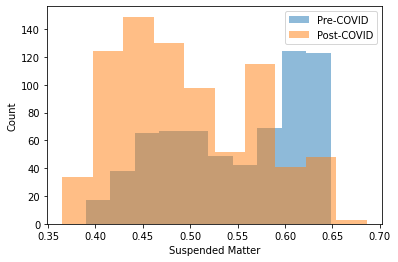

In [ ]:
# Create a histogram of suspended matter for pre-COVID and post-COVID periods
plt.hist(pre_covid_data['Suspended Matter'], alpha=0.5, label='Pre-COVID')
plt.hist(post_covid_data['Suspended Matter'], alpha=0.5, label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Suspended Matter')
plt.ylabel('Count')
plt.show()

Similar distribution of suspended matter values during pre and post COVID time periods; however, aveage of post-COVID is greater.

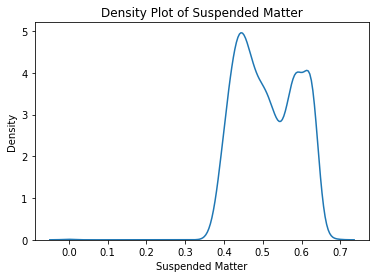

In [ ]:
# Density plot
sns.kdeplot(sm_df['Suspended Matter'])
plt.xlabel('Suspended Matter')
plt.title('Density Plot of Suspended Matter')
plt.show()

Suspended matter looks bi-modal.

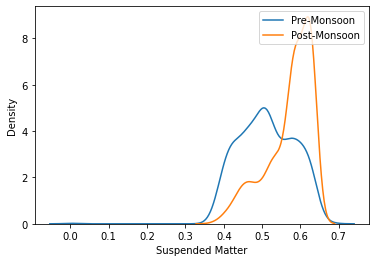

In [ ]:
# Monsoon periods separated out 
pre_monsoon_data = sm_df[sm_df['Month'].str.startswith(('01', '02', '03', '04', '05', '06'))]
post_monsoon_data = sm_df[sm_df['Month'].str.startswith(('07', '08', '09'))]

# Create a density plot of suspended matter for pre-monsoon and post-monsoon periods
sns.kdeplot(pre_monsoon_data['Suspended Matter'], label='Pre-Monsoon')
sns.kdeplot(post_monsoon_data['Suspended Matter'], label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Suspended Matter')
plt.ylabel('Density')
plt.show()

Average post-monsoon is greater than pre-monsoon.

Higher average suspended matter post-monsoon than pre-monsoon.

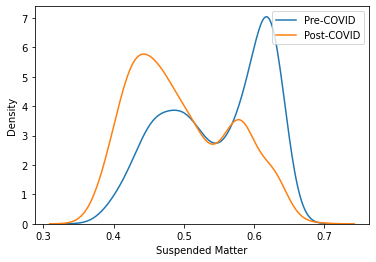

In [ ]:
# Create a density plot of suspended matter for pre-COVID and post-COVID periods
sns.kdeplot(pre_covid_data['Suspended Matter'], label='Pre-COVID')
sns.kdeplot(post_covid_data['Suspended Matter'], label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Suspended Matter')
plt.ylabel('Density')
plt.show()

Bi-modal distribution in both pre and post COVID time periods.

Not clear different pre and post COVID.

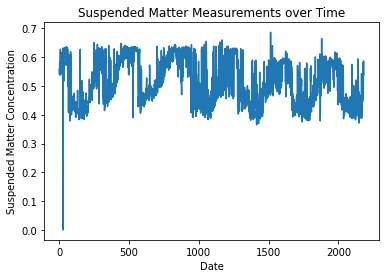

In [ ]:
# create a line plot
plt.plot(sm_df.index, sm_df['Suspended Matter'])

# set the title and labels for the axes
plt.title('Suspended Matter Measurements over Time')
plt.xlabel('Date')
plt.ylabel('Suspended Matter Concentration')

# display the plot
plt.show()

Cyclical trend observed in suspended matter, likely due to monsoon periods.

Text(0.5, 1.0, 'Distribution of Suspended Matter by Month')

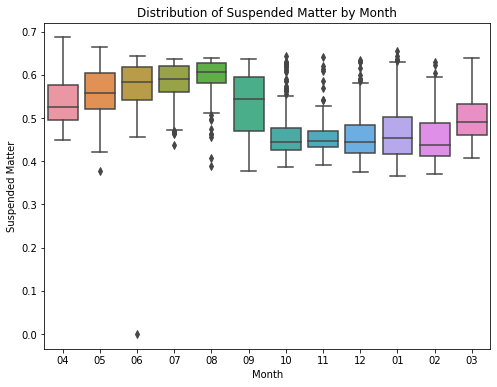

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Month', y='Suspended Matter', data=sm_df)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Suspended Matter')
plt.title('Distribution of Suspended Matter by Month')

Higher median suspended matter in months: 04, 05, 06, 07, 08, and 09. This makes sense given the period pre-monsoon and during monsoon.

Text(0.5, 1.0, 'Distribution of Suspended Matter by Year')

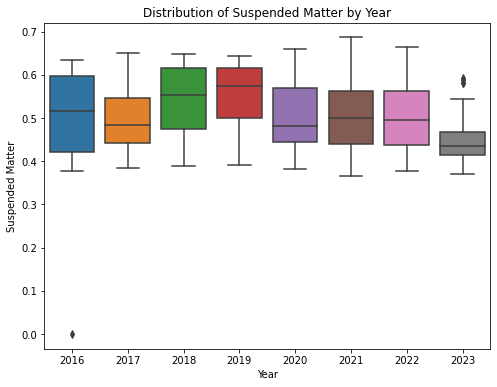

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Year', y='Suspended Matter', data=sm_df)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Suspended Matter')
plt.title('Distribution of Suspended Matter by Year')

Some outliers visible in 2016 and 2023 data. For the most part uniform distribution.

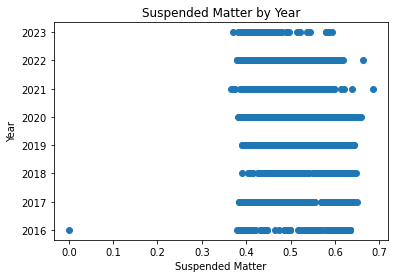

In [ ]:
# Scatter plot
plt.scatter(sm_df['Suspended Matter'], sm_df['Year'])
plt.xlabel('Suspended Matter')
plt.ylabel('Year')
plt.title('Suspended Matter by Year')
plt.show()

Dissolved Organic Matter

In [ ]:
# Read in dissolved organic matter and create Year, Month, Day variables
dom_df = pd.read_csv("/content/drive/My Drive/Upper Lake Data/Copy of Organic Matter_Upper Lake_LW.csv", parse_dates=True)
dom_df["date"] = pd.to_datetime(dom_df["date"], errors='coerce')
dom_df['Year'] = pd.to_datetime(dom_df['date']).dt.strftime('%Y')
dom_df['Month'] = pd.to_datetime(dom_df['date']).dt.strftime('%m')
dom_df['Day'] = pd.to_datetime(dom_df['date']).dt.strftime('%d')

dom_df.head()

,date,Organic Matter,Year,Month,Day
0,2016-04-29,0.519313,2016,04,29
1,2016-04-30,0.509203,2016,04,30
2,2016-05-03,0.474951,2016,05,03
3,2016-05-04,0.555740,2016,05,04
4,2016-05-07,0.490789,2016,05,07


In [ ]:
print(min(dom_df["date"]), max(dom_df["date"]))
print(dom_df.describe())

2016-04-29 00:00:00 2023-02-27 00:00:00
       Organic Matter
count     2168.000000
mean         0.459623
std          0.106034
min          0.000000
25%          0.365823
50%          0.439180
75%          0.569393
max          0.916731


Data from 2018-12-18 to 2022-12-27. Average dissolved organic matter 0.46 with standard deviation 0.11.

<Axes: xlabel='date', ylabel='Count'>

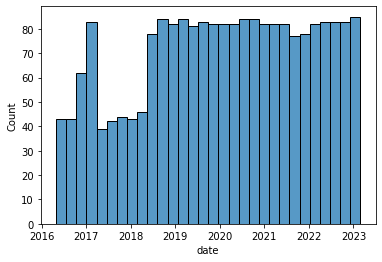

In [ ]:
sns.histplot(data = dom_df, x = 'date', bins = 30)

Pretty uniform data collection over the last 4 years

<Axes: xlabel='Organic Matter', ylabel='Count'>

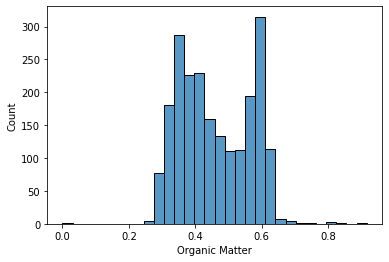

In [ ]:
sns.histplot(data = dom_df, x = 'Organic Matter', bins = 30)

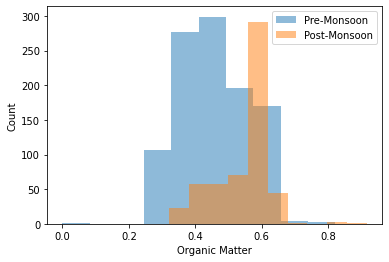

In [ ]:
# Monsoon periods separated out 
pre_monsoon_data = dom_df[dom_df['Month'].str.startswith(('01', '02', '03', '04', '05', '06'))]
post_monsoon_data = dom_df[dom_df['Month'].str.startswith(('07', '08', '09'))]

# Create a histogram of Organic Matter for pre-monsoon and post-monsoon periods
plt.hist(pre_monsoon_data['Organic Matter'], alpha=0.5, label='Pre-Monsoon')
plt.hist(post_monsoon_data['Organic Matter'], alpha=0.5, label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Organic Matter')
plt.ylabel('Count')
plt.show()

Higher average organic matter values post-monsoon than pre-monsoon.

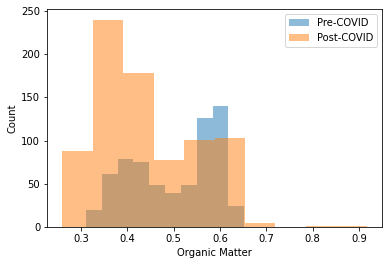

In [ ]:
# Extract the data for pre-COVID and post-COVID periods
pre_covid_data = dom_df[(dom_df["date"] >= pre_covid_start) & (dom_df["date"] <= pre_covid_end)]
post_covid_data = dom_df[(dom_df["date"] >= post_covid_start) & (dom_df["date"] <= post_covid_end)]

# Create a histogram of Organic Matter for pre-COVID and post-COVID periods
plt.hist(pre_covid_data['Organic Matter'], alpha=0.5, label='Pre-COVID')
plt.hist(post_covid_data['Organic Matter'], alpha=0.5, label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Organic Matter')
plt.ylabel('Count')
plt.show()

Higher average organic matter values post-monsoon than pre-monsoon.

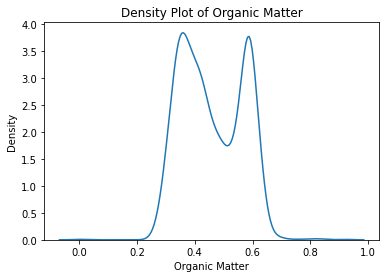

In [ ]:
# Density plot
sns.kdeplot(dom_df['Organic Matter'])
plt.xlabel('Organic Matter')
plt.title('Density Plot of Organic Matter')
plt.show()

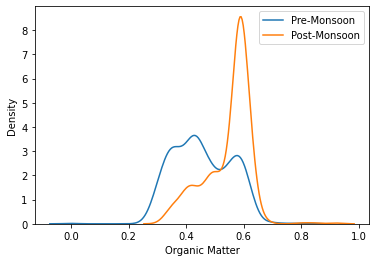

In [ ]:
# Monsoon periods separated out 
# Create a density plot of Organic Matter for pre-monsoon and post-monsoon periods
sns.kdeplot(pre_monsoon_data['Organic Matter'], label='Pre-Monsoon')
sns.kdeplot(post_monsoon_data['Organic Matter'], label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Organic Matter')
plt.ylabel('Density')
plt.show()

Higher average organic matter in post-monsoon period than pre-monsoon period.

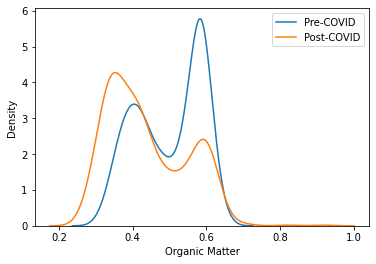

In [ ]:
# Create a density plot of Organic Matter for pre-COVID and post-COVID periods
sns.kdeplot(pre_covid_data['Organic Matter'], label='Pre-COVID')
sns.kdeplot(post_covid_data['Organic Matter'], label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Organic Matter')
plt.ylabel('Density')
plt.show()

Similar concentrations pre and post COVID.

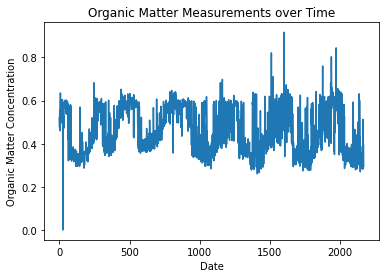

In [ ]:
# create a line plot
plt.plot(dom_df.index, dom_df['Organic Matter'])

# set the title and labels for the axes
plt.title('Organic Matter Measurements over Time')
plt.xlabel('Date')
plt.ylabel('Organic Matter Concentration')

# display the plot
plt.show()

Cyclical trend observed in organic matter concentrations, likely due to monsoon periods.

Text(0.5, 1.0, 'Distribution of Organic Matter by Month')

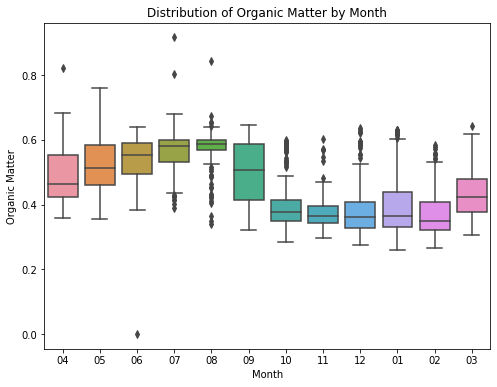

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Month', y='Organic Matter', data=dom_df)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Organic Matter')
plt.title('Distribution of Organic Matter by Month')

Higher median organic matter in months: 04, 05, 06, 07, 08, and 09. This makes sense given the period pre-monsoon and during monsoon. Some outliers identified.

Text(0.5, 1.0, 'Distribution of Organic Matter by Year')

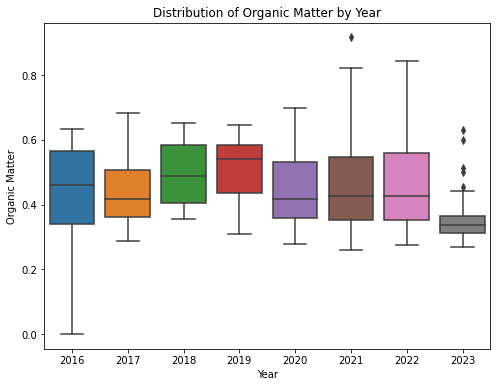

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Year', y='Organic Matter', data=dom_df)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Organic Matter')
plt.title('Distribution of Organic Matter by Year')

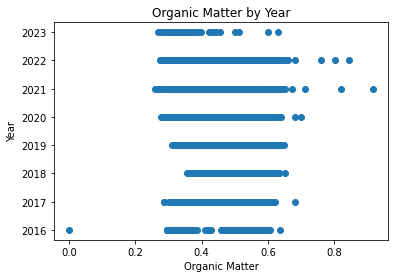

In [ ]:
# Scatter plot
plt.scatter(dom_df['Organic Matter'], dom_df['Year'])
plt.xlabel('Organic Matter')
plt.ylabel('Year')
plt.title('Organic Matter by Year')
plt.show()

Temperature

In [ ]:
tmp_df = pd.read_csv("/content/drive/My Drive/Upper Lake Data/Copy of Temperature_Upper Lake_LW.csv", parse_dates=True)
tmp_df["date"] = pd.to_datetime(tmp_df["date"], errors='coerce')
tmp_df['Year'] = pd.to_datetime(tmp_df['date']).dt.strftime('%Y')
tmp_df['Month'] = pd.to_datetime(tmp_df['date']).dt.strftime('%m')
tmp_df['Day'] = pd.to_datetime(tmp_df['date']).dt.strftime('%d')

print(tmp_df.head())
print(tmp_df.describe())

        date  Temperature  Year Month Day
0 2015-01-04    21.589863  2015    01  04
1 2015-01-11    19.941905  2015    01  11
2 2015-01-20    12.130249  2015    01  20
3 2015-01-27    19.471058  2015    01  27
4 2015-02-05    17.831090  2015    02  05
       Temperature
count   308.000000
mean     21.777074
std      25.304520
min    -123.148520
25%      20.436750
50%      25.614751
75%      32.528149
max      54.834427


<Axes: xlabel='date', ylabel='Count'>

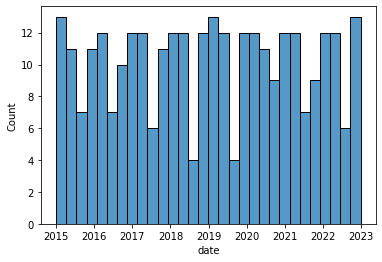

In [ ]:
sns.histplot(data = tmp_df, x = 'date', bins = 30)

<Axes: xlabel='Temperature', ylabel='Count'>

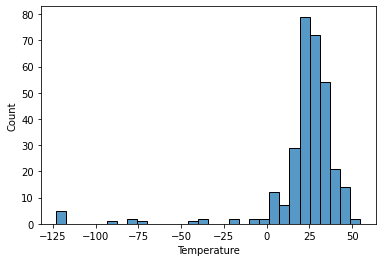

In [ ]:
sns.histplot(data = tmp_df, x = 'Temperature', bins = 30)

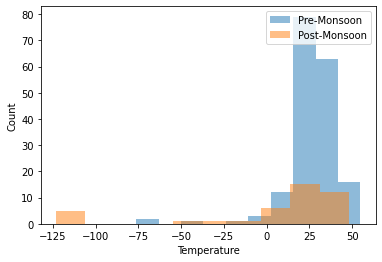

In [ ]:
# Monsoon periods separated out 
pre_monsoon_data = tmp_df[tmp_df['Month'].str.startswith(('01', '02', '03', '04', '05', '06'))]
post_monsoon_data = tmp_df[tmp_df['Month'].str.startswith(('07', '08', '09'))]

# Create a histogram of Temperature for pre-monsoon and post-monsoon periods
plt.hist(pre_monsoon_data['Temperature'], alpha=0.5, label='Pre-Monsoon')
plt.hist(post_monsoon_data['Temperature'], alpha=0.5, label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

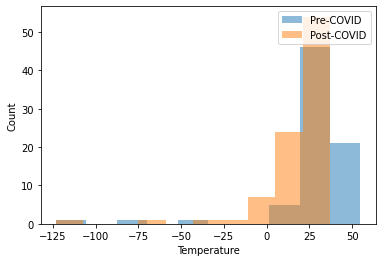

In [ ]:
# Extract the data for pre-COVID and post-COVID periods
pre_covid_data = tmp_df[(tmp_df["date"] >= pre_covid_start) & (tmp_df["date"] <= pre_covid_end)]
post_covid_data = tmp_df[(tmp_df["date"] >= post_covid_start) & (tmp_df["date"] <= post_covid_end)]

# Create a histogram of Temperature for pre-COVID and post-COVID periods
plt.hist(pre_covid_data['Temperature'], alpha=0.5, label='Pre-COVID')
plt.hist(post_covid_data['Temperature'], alpha=0.5, label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

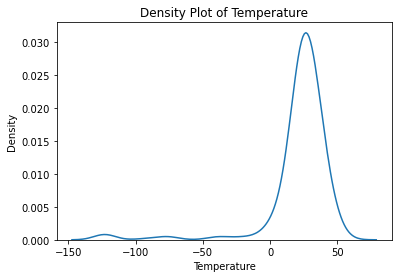

In [ ]:
# Density plot
sns.kdeplot(tmp_df['Temperature'])
plt.xlabel('Temperature')
plt.title('Density Plot of Temperature')
plt.show()

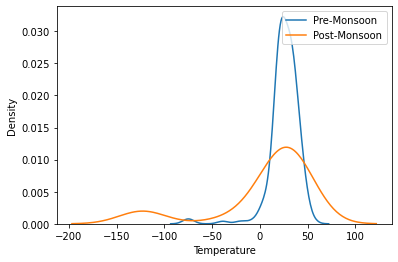

In [ ]:
# Create a density plot of Temperature for pre-monsoon and post-monsoon periods
sns.kdeplot(pre_monsoon_data['Temperature'], label='Pre-Monsoon')
sns.kdeplot(post_monsoon_data['Temperature'], label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.show()

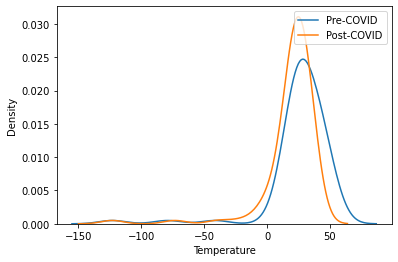

In [ ]:
# Create a density plot of Temperature for pre-COVID and post-COVID periods
sns.kdeplot(pre_covid_data['Temperature'], label='Pre-COVID')
sns.kdeplot(post_covid_data['Temperature'], label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.show()

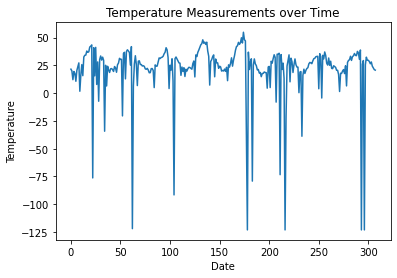

In [ ]:
# create a line plot
plt.plot(tmp_df.index, tmp_df['Temperature'])

# set the title and labels for the axes
plt.title('Temperature Measurements over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')

# display the plot
plt.show()

Cyclical trend observed in organic matter concentrations, likely due to monsoon periods. Data should be further investigated. Looks like a lot of outliers or incorrect temperature values in dataset.

Text(0.5, 1.0, 'Distribution of Temperature by Month')

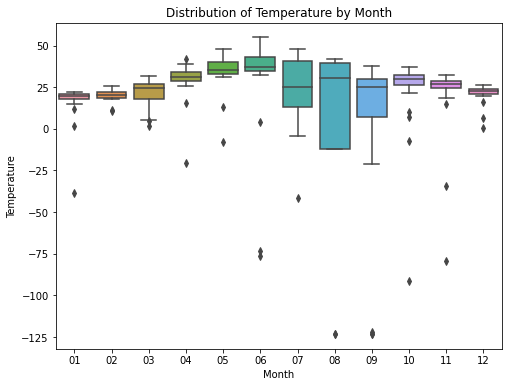

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Month', y='Temperature', data=tmp_df)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Distribution of Temperature by Month')

Temperature data should be QC'd further. Looks like lots of outliers and temperature values that do not make sense. Highest temperatures occur in monts 04, 05, and 06. 

Text(0.5, 1.0, 'Distribution of Temperature by Year')

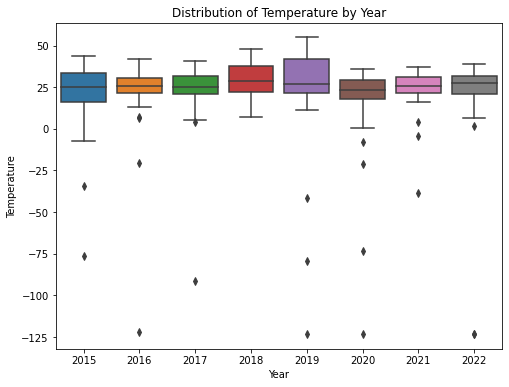

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Year', y='Temperature', data=tmp_df)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Distribution of Temperature by Year')

Again, there are clearly outliers and data should be QC'd futher. Looks like temperatures are pretty consistent over time.

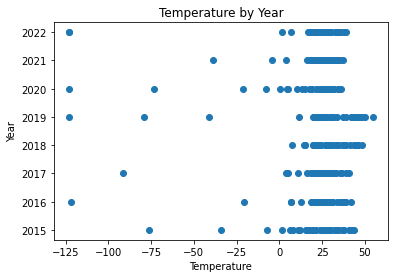

In [ ]:
# Scatter plot
plt.scatter(tmp_df['Temperature'], tmp_df['Year'])
plt.xlabel('Temperature')
plt.ylabel('Year')
plt.title('Temperature by Year')
plt.show()

NDSI NDTI NDSI pH DO

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Upper Lake Data/NDSI NDTI NDSI pH DO_Upper Lake.csv", parse_dates=True)
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df['Year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df['Day'] = pd.to_datetime(df['date']).dt.strftime('%d')
print(df.head())
print(df.describe())

        date  Chlorophyl  Turbidity  Salinity  Dissolved Oxygen        pH  \
0 2018-12-18    0.049798  -0.043534  0.042105          4.143289  7.555850   
1 2018-12-23    0.196289  -0.118611  0.214194          3.328343  7.648476   
2 2018-12-28    0.226072  -0.143236  0.137444          4.161987  7.762076   
3 2019-01-02    0.221531  -0.127573  0.156454          3.939463  7.770441   
4 2019-01-07    0.199136  -0.122187  0.153965          4.866198  7.810374   

   Year Month Day  
0  2018    12  18  
1  2018    12  23  
2  2018    12  28  
3  2019    01  02  
4  2019    01  07  
       Chlorophyl   Turbidity    Salinity  Dissolved Oxygen          pH
count  166.000000  166.000000  166.000000        166.000000  166.000000
mean     0.121776   -0.109960    0.134419          5.667765    7.449921
std      0.052777    0.081830    0.064544          3.246588    0.793128
min     -0.018934   -0.385234   -0.008880          1.124000   -0.536718
25%      0.074510   -0.169638    0.071621          4.0367

<Axes: xlabel='date', ylabel='Count'>

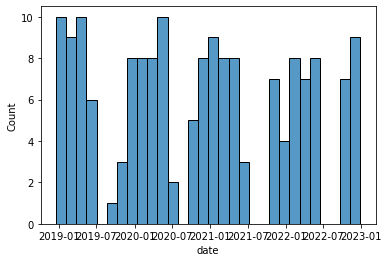

In [ ]:
sns.histplot(data = df[df['Chlorophyl'].notna()], x = 'date', bins = 30)

<Axes: xlabel='Chlorophyl', ylabel='Count'>

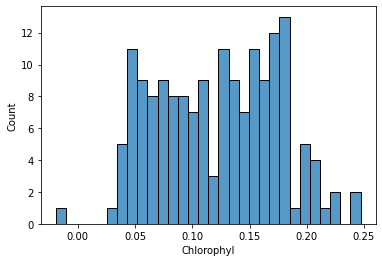

In [109]:
sns.histplot(data = df, x = 'Chlorophyl', bins = 30)

<Axes: xlabel='Turbidity', ylabel='Count'>

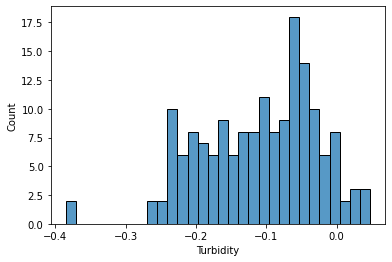

In [ ]:
sns.histplot(data = df, x = 'Turbidity', bins = 30)

<Axes: xlabel='Salinity', ylabel='Count'>

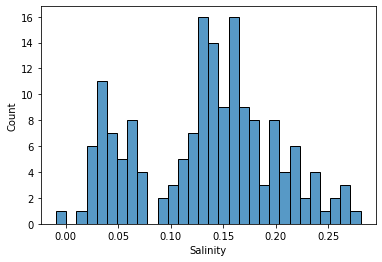

In [ ]:
sns.histplot(data = df, x = 'Salinity', bins = 30)

<Axes: xlabel='Dissolved Oxygen', ylabel='Count'>

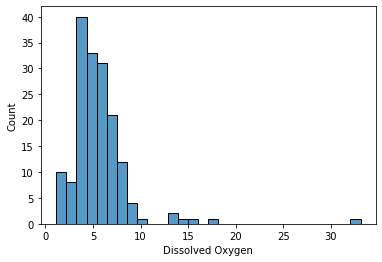

In [ ]:
sns.histplot(data = df, x = 'Dissolved Oxygen', bins = 30)

<Axes: xlabel='pH', ylabel='Count'>

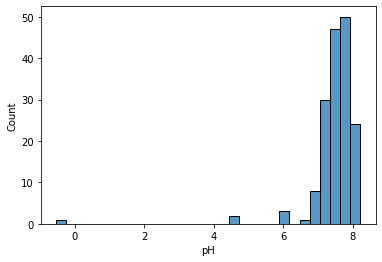

In [ ]:
sns.histplot(data = df, x = 'pH', bins = 30)

In [ ]:
# Monsoon periods separated out 
pre_monsoon_data = df[df['Month'].str.startswith(('01', '02', '03', '04', '05', '06'))]
post_monsoon_data = df[df['Month'].str.startswith(('07', '08', '09'))]

In [ ]:
print(df.columns)

Index(['date', 'Chlorophyl', 'Turbidity', 'Salinity', 'Dissolved Oxygen', 'pH',
       'Year', 'Month', 'Day'],
      dtype='object')


In [ ]:
# Define the pre-COVID and post-COVID periods
pre_covid_start = pd.to_datetime('2018-01-01')
pre_covid_end = pd.to_datetime('2019-12-31')
post_covid_start = pd.to_datetime('2020-01-01')
post_covid_end = pd.to_datetime('2022-03-19') # current date as of this session

pre_covid_data = df[(df["date"] >= pre_covid_start) & (df["date"] <= pre_covid_end)]
post_covid_data = df[(df["date"] >= post_covid_start) & (df["date"] <= post_covid_end)]


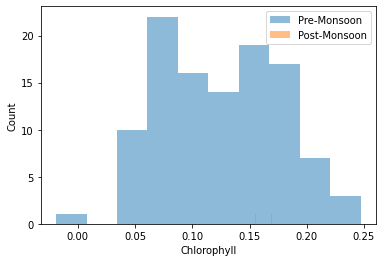

In [ ]:
# Create a histogram of Chlorophyll for pre-monsoon and post-monsoon periods
plt.hist(pre_monsoon_data['Chlorophyl'], alpha=0.5, label='Pre-Monsoon')
plt.hist(post_monsoon_data['Chlorophyl'], alpha=0.5, label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Chlorophyll')
plt.ylabel('Count')
plt.show()

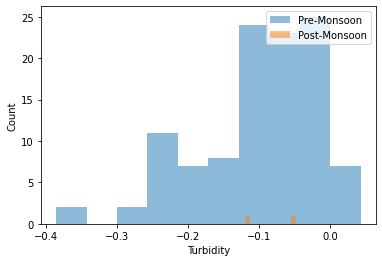

In [ ]:
# Create a histogram of  for pre-monsoon and post-monsoon periods
plt.hist(pre_monsoon_data['Turbidity'], alpha=0.5, label='Pre-Monsoon')
plt.hist(post_monsoon_data['Turbidity'], alpha=0.5, label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Turbidity')
plt.ylabel('Count')
plt.show()

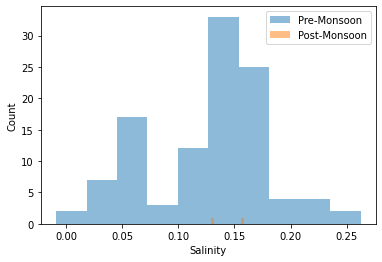

In [ ]:
# Create a histogram of  for pre-monsoon and post-monsoon periods
plt.hist(pre_monsoon_data['Salinity'], alpha=0.5, label='Pre-Monsoon')
plt.hist(post_monsoon_data['Salinity'], alpha=0.5, label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Salinity')
plt.ylabel('Count')
plt.show()

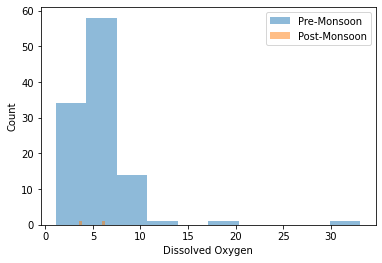

In [ ]:
# Create a histogram of  for pre-monsoon and post-monsoon periods
plt.hist(pre_monsoon_data['Dissolved Oxygen'], alpha=0.5, label='Pre-Monsoon')
plt.hist(post_monsoon_data['Dissolved Oxygen'], alpha=0.5, label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Count')
plt.show()

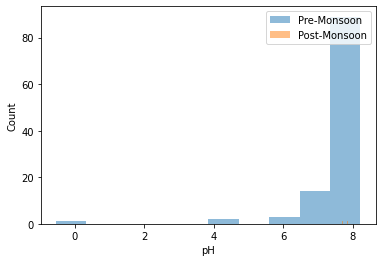

In [ ]:
# Create a histogram of  for pre-monsoon and post-monsoon periods
plt.hist(pre_monsoon_data['pH'], alpha=0.5, label='Pre-Monsoon')
plt.hist(post_monsoon_data['pH'], alpha=0.5, label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

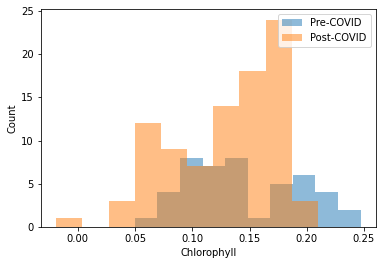

In [ ]:
# Create a histogram of Chlorophyll for pre-COVID and post-COVID periods
plt.hist(pre_covid_data['Chlorophyl'], alpha=0.5, label='Pre-COVID')
plt.hist(post_covid_data['Chlorophyl'], alpha=0.5, label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Chlorophyll')
plt.ylabel('Count')
plt.show()

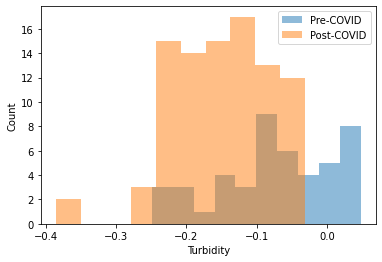

In [ ]:
# Create a histogram of Turbidity for pre-COVID and post-COVID periods
plt.hist(pre_covid_data['Turbidity'], alpha=0.5, label='Pre-COVID')
plt.hist(post_covid_data['Turbidity'], alpha=0.5, label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Turbidity')
plt.ylabel('Count')
plt.show()

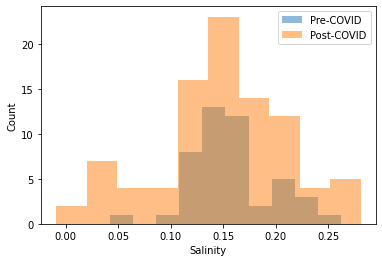

In [ ]:
# Create a histogram of Salinity for pre-COVID and post-COVID periods
plt.hist(pre_covid_data['Salinity'], alpha=0.5, label='Pre-COVID')
plt.hist(post_covid_data['Salinity'], alpha=0.5, label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Salinity')
plt.ylabel('Count')
plt.show()

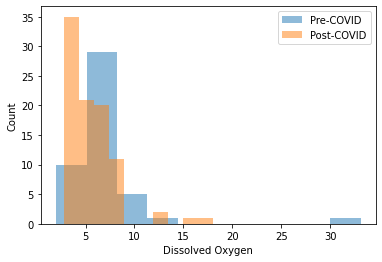

In [ ]:
# Create a histogram of Dissolved Oxygen for pre-COVID and post-COVID periods
plt.hist(pre_covid_data['Dissolved Oxygen'], alpha=0.5, label='Pre-COVID')
plt.hist(post_covid_data['Dissolved Oxygen'], alpha=0.5, label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Count')
plt.show()

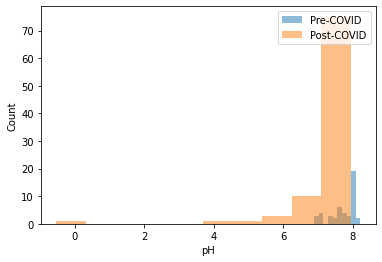

In [ ]:
# Create a histogram of pH for pre-COVID and post-COVID periods
plt.hist(pre_covid_data['pH'], alpha=0.5, label='Pre-COVID')
plt.hist(post_covid_data['pH'], alpha=0.5, label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

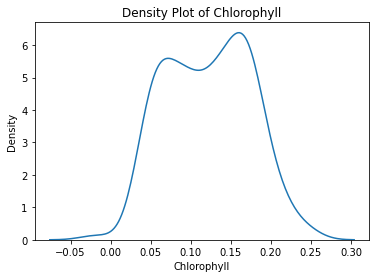

In [ ]:
# Density plot
sns.kdeplot(df['Chlorophyl'])
plt.xlabel('Chlorophyll')
plt.title('Density Plot of Chlorophyll')
plt.show()

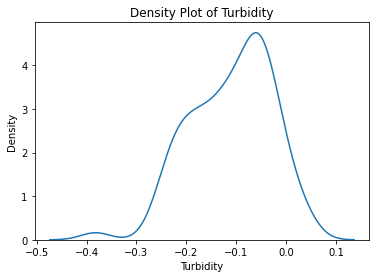

In [ ]:
# Density plot
sns.kdeplot(df['Turbidity'])
plt.xlabel('Turbidity')
plt.title('Density Plot of Turbidity')
plt.show()

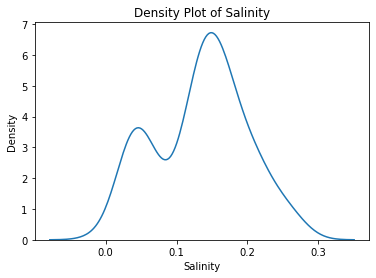

In [ ]:
# Density plot
sns.kdeplot(df['Salinity'])
plt.xlabel('Salinity')
plt.title('Density Plot of Salinity')
plt.show()

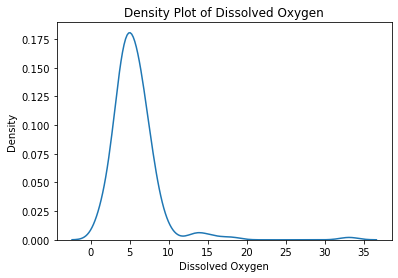

In [ ]:
# Density plot
sns.kdeplot(df['Dissolved Oxygen'])
plt.xlabel('Dissolved Oxygen')
plt.title('Density Plot of Dissolved Oxygen')
plt.show()

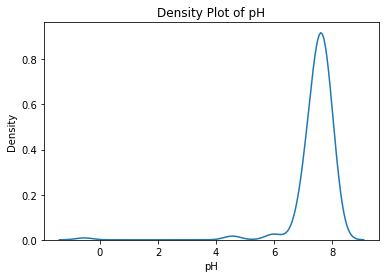

In [ ]:
# Density plot
sns.kdeplot(df['pH'])
plt.xlabel('pH')
plt.title('Density Plot of pH')
plt.show()

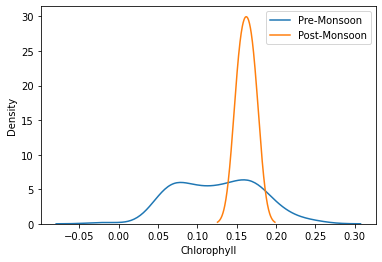

In [ ]:
# Create a density plot of Chlorophyll for pre-monsoon and post-monsoon periods
sns.kdeplot(pre_monsoon_data['Chlorophyl'], label='Pre-Monsoon')
sns.kdeplot(post_monsoon_data['Chlorophyl'], label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Chlorophyll')
plt.ylabel('Density')
plt.show()

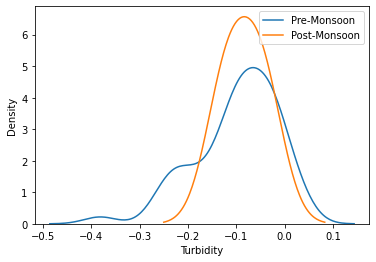

In [ ]:
# Create a density plot of Turbidity for pre-monsoon and post-monsoon periods
sns.kdeplot(pre_monsoon_data['Turbidity'], label='Pre-Monsoon')
sns.kdeplot(post_monsoon_data['Turbidity'], label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Turbidity')
plt.ylabel('Density')
plt.show()

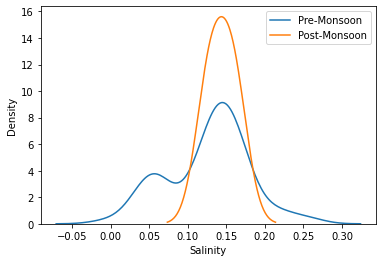

In [ ]:
# Create a density plot of Salinity for pre-monsoon and post-monsoon periods
sns.kdeplot(pre_monsoon_data['Salinity'], label='Pre-Monsoon')
sns.kdeplot(post_monsoon_data['Salinity'], label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Salinity')
plt.ylabel('Density')
plt.show()

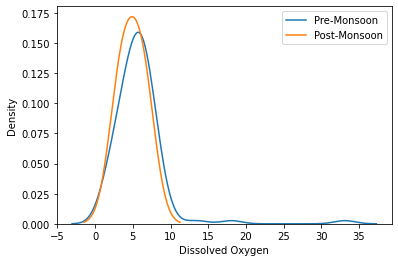

In [ ]:
# Create a density plot of Dissolved Oxygen for pre-monsoon and post-monsoon periods
sns.kdeplot(pre_monsoon_data['Dissolved Oxygen'], label='Pre-Monsoon')
sns.kdeplot(post_monsoon_data['Dissolved Oxygen'], label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

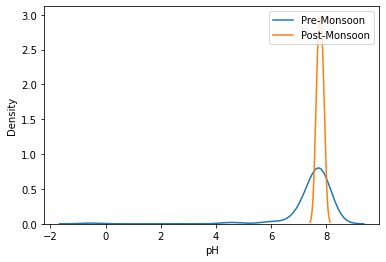

In [ ]:
# Create a density plot of pH for pre-monsoon and post-monsoon periods
sns.kdeplot(pre_monsoon_data['pH'], label='Pre-Monsoon')
sns.kdeplot(post_monsoon_data['pH'], label='Post-Monsoon')
plt.legend(loc='upper right')
plt.xlabel('pH')
plt.ylabel('Density')
plt.show()

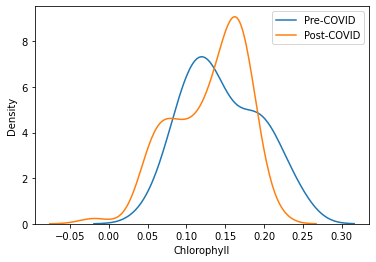

In [ ]:
# Create a density plot of Chlorophyll for pre-COVID and post-COVID periods
sns.kdeplot(pre_covid_data['Chlorophyl'], label='Pre-COVID')
sns.kdeplot(post_covid_data['Chlorophyl'], label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Chlorophyll')
plt.ylabel('Density')
plt.show()

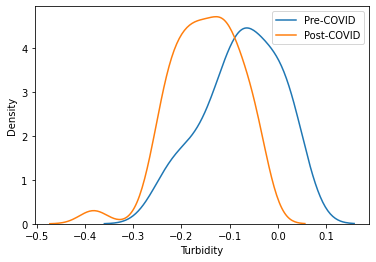

In [ ]:
# Create a density plot of Turbidity for pre-COVID and post-COVID periods
sns.kdeplot(pre_covid_data['Turbidity'], label='Pre-COVID')
sns.kdeplot(post_covid_data['Turbidity'], label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Turbidity')
plt.ylabel('Density')
plt.show()

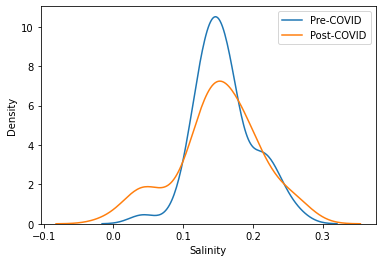

In [ ]:
# Create a density plot of Salinity for pre-COVID and post-COVID periods
sns.kdeplot(pre_covid_data['Salinity'], label='Pre-COVID')
sns.kdeplot(post_covid_data['Salinity'], label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Salinity')
plt.ylabel('Density')
plt.show()

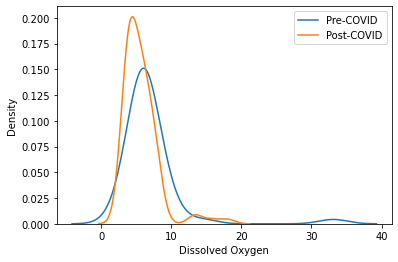

In [ ]:
# Create a density plot of Dissolved Oxygen for pre-COVID and post-COVID periods
sns.kdeplot(pre_covid_data['Dissolved Oxygen'], label='Pre-COVID')
sns.kdeplot(post_covid_data['Dissolved Oxygen'], label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

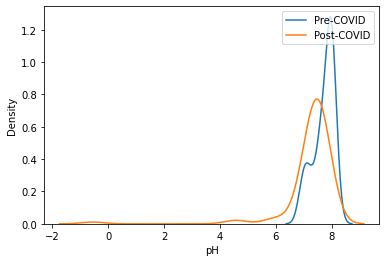

In [ ]:
# Create a density plot of pH for pre-COVID and post-COVID periods
sns.kdeplot(pre_covid_data['pH'], label='Pre-COVID')
sns.kdeplot(post_covid_data['pH'], label='Post-COVID')
plt.legend(loc='upper right')
plt.xlabel('pH')
plt.ylabel('Density')
plt.show()

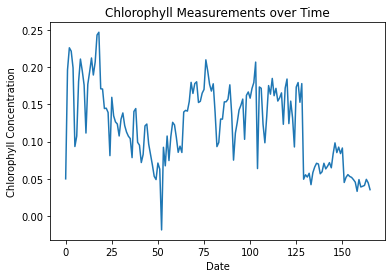

In [ ]:
# create a line plot
plt.plot(df.index, df['Chlorophyl'])

# set the title and labels for the axes
plt.title('Chlorophyll Measurements over Time')
plt.xlabel('Date')
plt.ylabel('Chlorophyll Concentration')

# display the plot
plt.show()

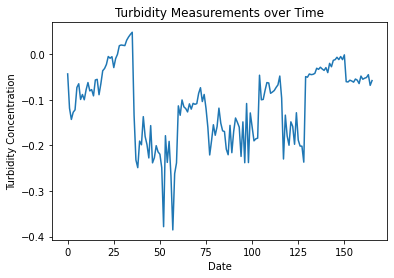

In [ ]:
# create a line plot
plt.plot(df.index, df['Turbidity'])

# set the title and labels for the axes
plt.title('Turbidity Measurements over Time')
plt.xlabel('Date')
plt.ylabel('Turbidity Concentration')

# display the plot
plt.show()

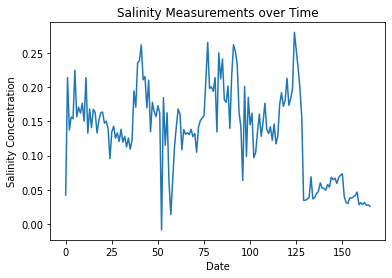

In [ ]:
# create a line plot
plt.plot(df.index, df['Salinity'])

# set the title and labels for the axes
plt.title('Salinity Measurements over Time')
plt.xlabel('Date')
plt.ylabel('Salinity Concentration')

# display the plot
plt.show()

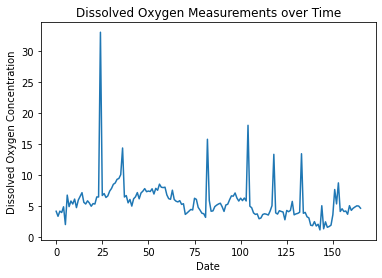

In [ ]:
# create a line plot
plt.plot(df.index, df['Dissolved Oxygen'])

# set the title and labels for the axes
plt.title('Dissolved Oxygen Measurements over Time')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen Concentration')

# display the plot
plt.show()

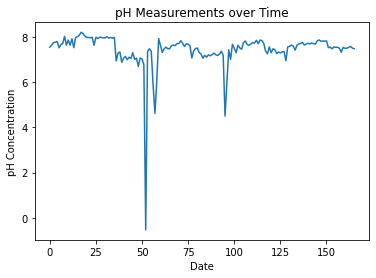

In [ ]:
# create a line plot
plt.plot(df.index, df['pH'])

# set the title and labels for the axes
plt.title('pH Measurements over Time')
plt.xlabel('Date')
plt.ylabel('pH Concentration')

# display the plot
plt.show()

Text(0.5, 1.0, 'Distribution of Chlorophyll by Month')

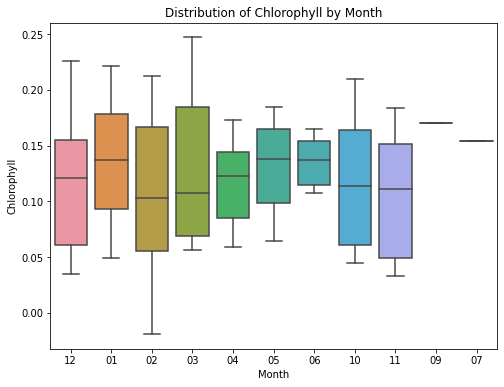

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Month', y='Chlorophyl', data=df)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Chlorophyll')
plt.title('Distribution of Chlorophyll by Month')

Text(0.5, 1.0, 'Distribution of Turbidity by Month')

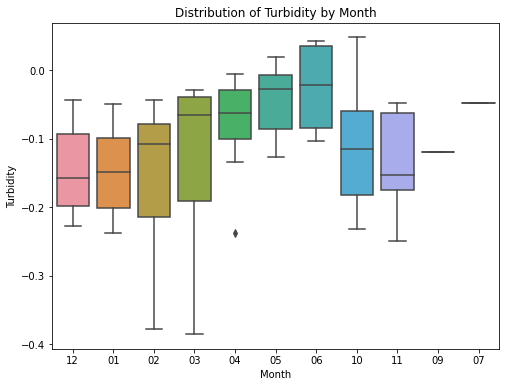

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Month', y='Turbidity', data=df)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Turbidity')
plt.title('Distribution of Turbidity by Month')

Text(0.5, 1.0, 'Distribution of Salinity by Month')

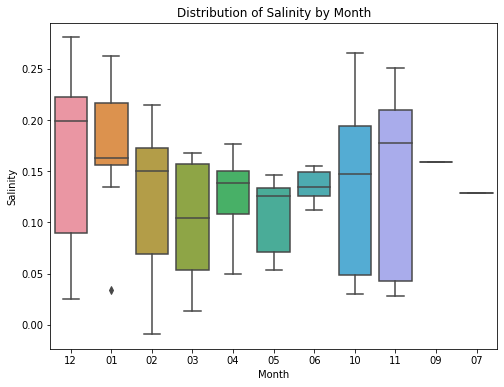

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Month', y='Salinity', data=df)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Salinity')
plt.title('Distribution of Salinity by Month')

Text(0.5, 1.0, 'Distribution of Dissolved Oxygen by Month')

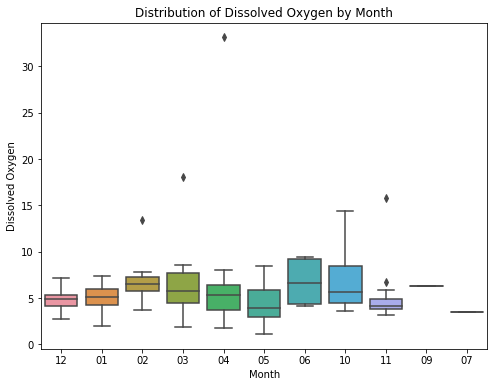

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Month', y='Dissolved Oxygen', data=df)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Dissolved Oxygen')
plt.title('Distribution of Dissolved Oxygen by Month')

Text(0.5, 1.0, 'Distribution of pH by Month')

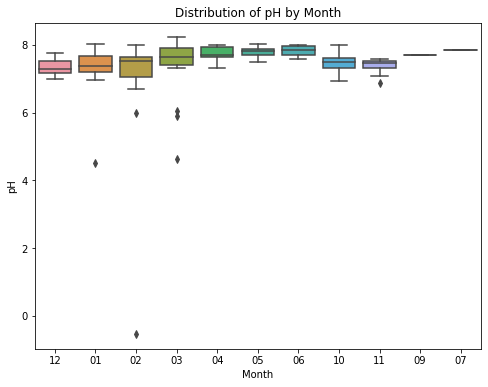

In [ ]:
# Box plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Month', y='pH', data=df)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('pH')
plt.title('Distribution of pH by Month')

Text(0.5, 1.0, 'Distribution of Chlorophyll by Year')

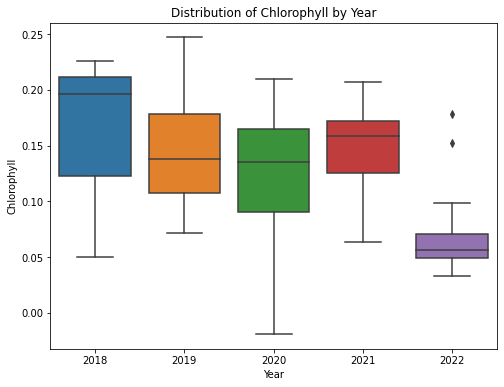

In [ ]:
# Box plot by year
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Year', y='Chlorophyl', data=df)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Chlorophyll')
plt.title('Distribution of Chlorophyll by Year')

Text(0.5, 1.0, 'Distribution of Turbidity by Year')

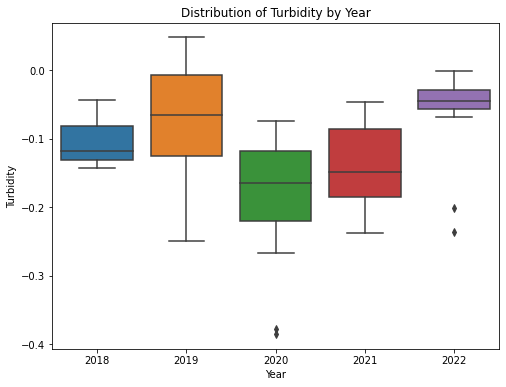

In [ ]:
# Box plot by year
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Year', y='Turbidity', data=df)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Turbidity')
plt.title('Distribution of Turbidity by Year')

Text(0.5, 1.0, 'Distribution of Salinity by Year')

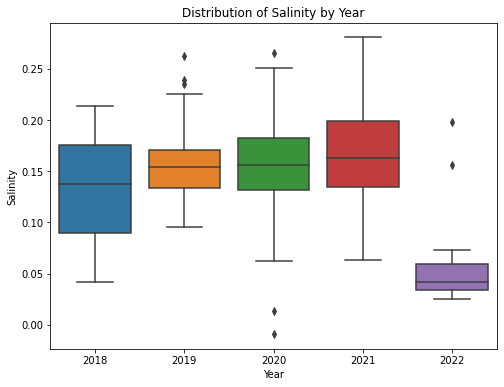

In [ ]:
# Box plot by year
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Year', y='Salinity', data=df)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Salinity')
plt.title('Distribution of Salinity by Year')

Text(0.5, 1.0, 'Distribution of Dissolved Oxygen by Year')

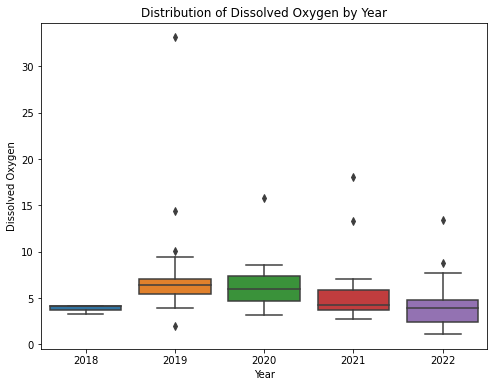

In [ ]:
# Box plot by year
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Year', y='Dissolved Oxygen', data=df)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Dissolved Oxygen')
plt.title('Distribution of Dissolved Oxygen by Year')

Text(0.5, 1.0, 'Distribution of pH by Year')

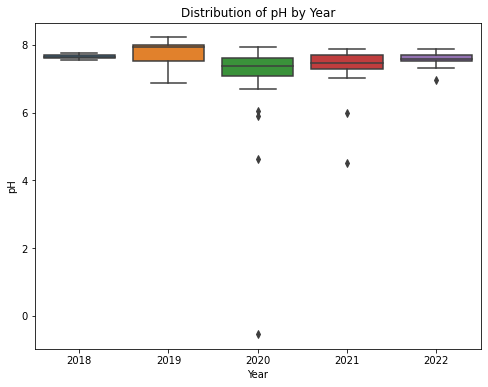

In [ ]:
# Box plot by year
# Set the figure size
plt.figure(figsize=(8,6))

# Create the box plot
sns.boxplot(x='Year', y='pH', data=df)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('pH')
plt.title('Distribution of pH by Year')

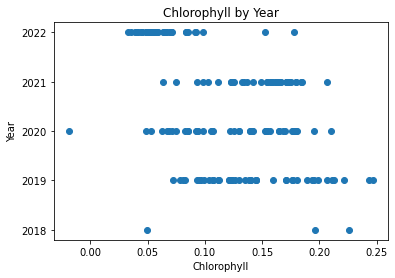

In [ ]:
# Scatter plot
plt.scatter(df['Chlorophyl'], df['Year'])
plt.xlabel('Chlorophyll')
plt.ylabel('Year')
plt.title('Chlorophyll by Year')
plt.show()

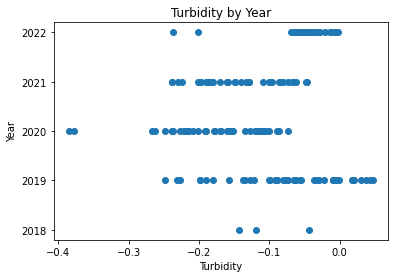

In [ ]:
# Scatter plot
plt.scatter(df['Turbidity'], df['Year'])
plt.xlabel('Turbidity')
plt.ylabel('Year')
plt.title('Turbidity by Year')
plt.show()

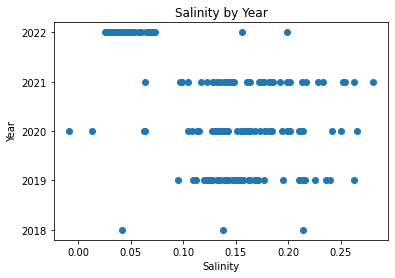

In [ ]:
# Scatter plot
plt.scatter(df['Salinity'], df['Year'])
plt.xlabel('Salinity')
plt.ylabel('Year')
plt.title('Salinity by Year')
plt.show()

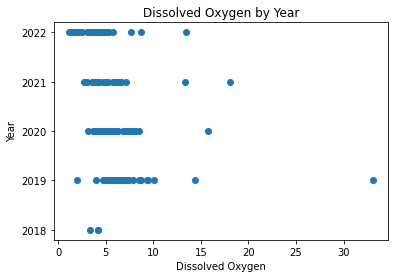

In [ ]:
# Scatter plot
plt.scatter(df['Dissolved Oxygen'], df['Year'])
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Year')
plt.title('Dissolved Oxygen by Year')
plt.show()

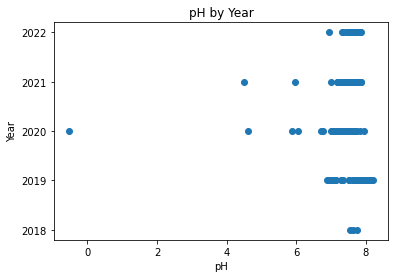

In [ ]:
# Scatter plot
plt.scatter(df['pH'], df['Year'])
plt.xlabel('pH')
plt.ylabel('Year')
plt.title('pH by Year')
plt.show()

Some bivariate visualizations

Text(0.5, 1.0, 'Correlation Matrix')

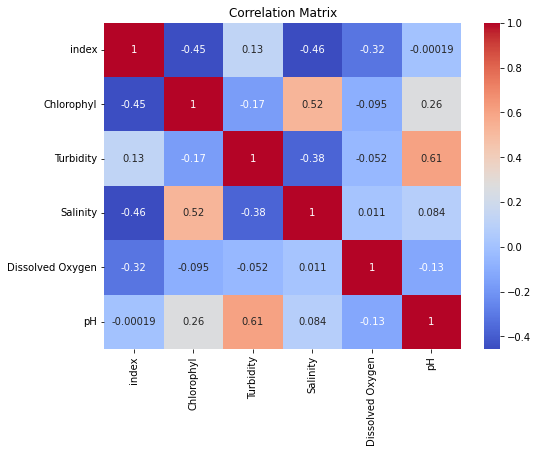

In [ ]:
# Heat map
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(8,6))

# Create the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Set the title
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Salinity vs Chlorophyll Concentration')

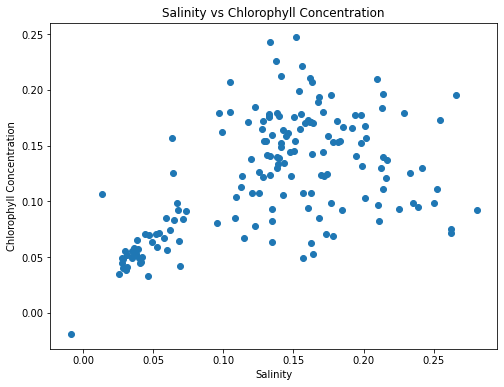

In [ ]:
# Scatter plot
# Set the figure size
plt.figure(figsize=(8,6))

# Create the scatter plot
plt.scatter(x=df['Salinity'], y=df['Chlorophyl'])

# Set the axis labels and title
plt.xlabel('Salinity')
plt.ylabel('Chlorophyll Concentration')
plt.title('Salinity vs Chlorophyll Concentration')